<H2>課題4: サッカーの試合における結果の予測</H2>
<p>過去の試合データを使って、試合の結果を予測します。</p>
<p>レッスン9で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み</H2>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

<H2>2. データの読み込み</H2>
<p>データはdatasetフォルダ直下にある"J1_data.csv"を使用します。</p>
<p>このデータセットはFootball-Data.co.jp (http://www.football-data.co.uk/japan.php) から引用したものを加工しています。</p>

In [2]:
# データを読み込んで変数 data に格納
data = pd.read_csv('J1_data.csv')

In [3]:
# データの最初の5行だけ表示
data.head()

,Home,Away,Home_Goals,Away_Goals
0,G-Osaka,Kobe,2,3
1,Hiroshima,Urawa,1,0
2,Nagoya,Shimizu,1,0
3,Sagan Tosu,C-Osaka,0,0
4,Sapporo,Iwata,0,0


In [4]:
data.shape

(2140, 4)

In [5]:
# Homeチームのゴール数の平均と, Awayチームのゴール数の平均を計算して表示
avg_Home = sum(data['Home_Goals']) / len(data['Home_Goals'])
avg_Away = sum(data['Away_Goals']) / len(data['Away_Goals'])

print('Homeチームのゴール数の平均：', avg_Home)
print('Awayチームのゴール数の平均：', avg_Away)

Homeチームのゴール数の平均： 1.4177570093457943
Awayチームのゴール数の平均： 1.253271028037383


<H2>3. データ概要の把握</H2>
<p>先ほどの「ゴールの平均」を見ると、どうやらHomeチームとAwayチームで得点に差がありそうです。ヒストグラムを作図して詳細を確認してみましょう。</p>

Text(0.5,0,'Goals')

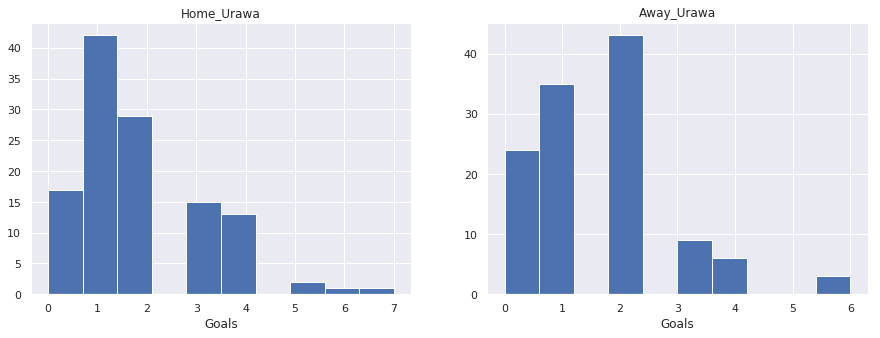

In [6]:
# プロットエリアを2つに分け、Urawaに関して「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
# なお、ヒストグラムの表示には Matplotlib の hist を使い、figureで2つのグラフを「並べて」表示すること。
# ※ histの詳細： https://matplotlib.org/2.2.2/api/_as_gen/matplotlib.pyplot.hist.html

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#plt.subplots_adjust(wspace=0.1, hspace=0.6)

# Homeで試合をしたときの得点のヒストグラム
plt.subplot(1, 2, 1)
plt.hist(data.query('Home == "Urawa"')['Home_Goals'])
plt.title('Home_Urawa')
plt.xlabel('Goals')

# Awayで試合をしたときの得点のヒストグラム
plt.subplot(1, 2, 2)
plt.hist(data.query('Away == "Urawa"')['Away_Goals'])
plt.title('Away_Urawa')
plt.xlabel('Goals')

Text(0.5,0,'Goals')

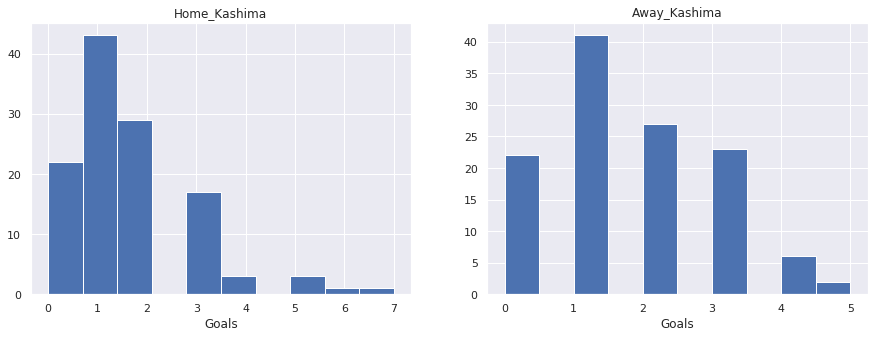

In [7]:
# もう1つ、どこか違うチームをピックアップして、同様に
# 「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#plt.subplots_adjust(wspace=0.1, hspace=0.6)

# Homeで試合をしたときの得点のヒストグラム
plt.subplot(1, 2, 1)
plt.hist(data.query('Home == "Kashima"')['Home_Goals'])
plt.title('Home_Kashima')
plt.xlabel('Goals')

# Awayで試合をしたときの得点のヒストグラム
plt.subplot(1, 2, 2)
plt.hist(data.query('Away == "Kashima"')['Away_Goals'])
plt.title('Away_Kashima')
plt.xlabel('Goals')

<H2>4. モデルの作成</H2>
<p>ここでは2通りのモデルを作成し、AICを確認してみましょう。</p>

In [8]:
# 説明変数：Away_Goals、HomeとAwayを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_1 = smf.glm('Home_Goals ~ Away_Goals + Home + Away', data=data, family=sm.families.Poisson()).fit()
model_1.aic

6448.857703135879

In [9]:
# 説明変数：HomeとAway_Goalsを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_2 = smf.glm('Home_Goals ~ Home + Away_Goals', data=data, family=sm.families.Poisson()).fit()
model_2.aic

6472.639085015406

In [10]:
# 上記2つのモデルを比較し、選択すべき最適なモデルについて詳細を表示
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Home_Goals   No. Observations:                 2140
Model:                            GLM   Df Residuals:                     2087
Model Family:                 Poisson   Df Model:                           52
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.4
Date:                Sat, 30 May 2020   Deviance:                       2433.7
Time:                        13:08:58   Pearson chi2:                 2.13e+03
No. Iterations:                    20   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0668      0.132     -0.505      0.614      -0.326       0.193
Home[T.Avispa Fukuoka]       -0.0592      0.269     -0.220      0.826      -0.587       0.469
Home[T.C-Osaka]               0.4320      0.133      3.252      0.001       0.172       0.692
Home[T.FC Tokyo]              0.4069      0.125      3.256      0.001       0.162       0.652
Home[T.G-Osaka]               0.5258      0.126      4.182      0.000       0.279       0.772
Home[T.Hiroshima]             0.4595      0.124      3.716      0.000       0.217       0.702
Home[T.Iwata]                 0.3488      0.135      2.579      0.010       0.084       0.614
Home[T.Kashima]               0.4952      0.123      4.020      0.000       0.254       0.737
Home[T.Kashiwa]               0.4445      0.124      3.581      0.000       0.201       0.688
Home[T.Kawasaki Frontale]     0.7168      0.119      6.041      0.000       0.484       0.949
Home[T.Kobe]                  0.3414      0.131      2.611      0.009       0.085       0.598
Home[T.Kofu]                 -0.1905      0.156     -1.218      0.223      -0.497       0.116
Home[T.Montedio Yamagata]    -0.1853      0.286     -0.649      0.517      -0.745       0.375
Home[T.Nagoya]                0.3949      0.129      3.055      0.002       0.142       0.648
Home[T.Oita]                 -0.1822      0.286     -0.638      0.523      -0.742       0.377
Home[T.Omiya Ardija]          0.1612      0.142      1.138      0.255      -0.116       0.439
Home[T.Sagan Tosu]            0.2572      0.129      1.994      0.046       0.004       0.510
Home[T.Sapporo]               0.2288      0.162      1.408      0.159      -0.090       0.547
Home[T.Shimizu]               0.2962      0.131      2.257      0.024       0.039       0.554
Home[T.Shonan]               -0.0340      0.159     -0.213      0.831      -0.346       0.278
Home[T.Tokushima]            -1.2166      0.458     -2.654      0.008      -2.115      -0.318
Home[T.Urawa]                 0.6208      0.120      5.155      0.000       0.385       0.857
Home[T.V-Varen Nagasaki]      0.1154      0.256      0.450      0.652      -0.387       0.617
Home[T.Vegalta Sendai]        0.4373      0.124      3.526      0.000       0.194       0.680
Home[T.Yamaga]                0.1723      0.245      0.702      0.482      -0.308       0.653
Home[T.Yokohama M.]           0.3622      0.126      2.875      0.004       0.115       0.609
Away[T.Avispa Fukuoka]        0.3390      0.193      1.755      0.079      -0.040       0.718
Away[T.C-Osaka]              -0.0896      0.127     -0.707      0.480      -0.338       0.159
Away[T.FC Tokyo]             -0.1706      0.119     -1.437      0.151      -0.403       0.062
Away[T.G-Osaka]              -0.0014      0.117     -0.012      0.991      -0.232       0.229
Away[T.Hiroshima]            -0.2424      0.120     -2.015  

In [11]:
# Home: Urawa, Away: KashimaでAwayのチームが0得点だった場合のHomeの得点を予測
Urawa_Kashima_Away_0 = pd.DataFrame({'Home': ['Urawa'], 'Away': ['Kashima'], 'Away_Goals': [0]})
model_1.predict(Urawa_Kashima_Away_0)

0    1.575325
dtype: float64

In [76]:
# Home: Urawa, Away: KashimaでAwayのチームが2得点だった場合のHomeの得点を予測
Urawa_Kashima_Away_2 = pd.DataFrame({'Home': ['Urawa'], 'Away': ['Kashima'], 'Away_Goals': [2]})
model_1.predict(Urawa_Kashima_Away_2)

0    1.730129
dtype: float64

<H2>5. シミュレーション</H2>
<p>ここまでの内容で「Homeの点数の予測値は、Awayの点数によって変わる」ことがわかりました。しかし、このままでは「どちらが勝つか」を明言することができません。</p>
<p>Awayの得点は、これまでのAwayでの得点平均をlambda（λ：強度）とするポアソン分布に従うことがわかっています。ですので、ポアソン分布から乱数を発生させ、その結果からHomeの得点を予測してみましょう。</p>

In [13]:
# 今回はKashimaがAwayですので、Kashimaの　Awayでの得点平均を計算
Kashima_Away_avg = data.query('Away == "Kashima"')['Away_Goals'].mean()
Kashima_Away_avg

1.6363636363636365

In [14]:
# 上記で求めた平均=lambda(強度：λ)としたポアソン分布から乱数を100個発生させる。np.random.poisson()を使うこと。
# 参考：https://docs.scipy.org/doc/numpy-1.14.2/reference/generated/numpy.random.poisson.html
s = np.random.poisson(lam=(Kashima_Away_avg), size=(100))

In [111]:
# Awayの得点よりHomeの得点を予測
#Home_pred = pd.DataFrame({'Home':['Urawa'], 'Away':['Kashima'], 'Away_Goals': [s]})

Home_pred = pd.DataFrame(index=[], columns=['Home', 'Away', 'Away_Goals'])

Home_Goals_Urawa = []
for i in range(len(s)):
    Home_pred = pd.DataFrame({'Home':['Urawa'], 'Away':['Kashima'], 'Away_Goals': [s[i]]})
    Home_Goals_Urawa.append(model_1.predict(Home_pred))

In [115]:
# Homeチームの得点が上回っているデータの個数を計算することで「Homeのチームが勝つ確率」を算出して、表示
count = 0
for i in range(len(s)):
    if float(Home_Goals_Urawa[i]) > float(s[i]):
        count += 1
print((count / len(s)) * 100, '%')

52.0 %
